Un lien pour executer, modifier,... cet exemple pas à pas sur le serveur JupyterHub de l'UGA en cliquant sur ce badge
[![badge](https://img.shields.io/badge/launch-UGA%20JupyterHub-F5A252.svg?logo=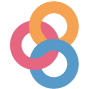)](https://jupyterhub.u-ga.fr/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Ffchatelain%2FOOPExamples&urlpath=lab%2Ftree%2FOOPExamples%2FTestTableaux.ipynb&branch=master)
(connexion avec vos identifiants Agalan)

# Java : Tableaux, membre de classe `static` 

A partir de l'exemple `TestTableaux.java`

In [18]:
// une classe un peu bête....
class CompteEnBanque {
    int numero;
    int solde;

    private static int nbInstances = 0; // un attribut de classe. On l'initialise lors de la déclaration

    public CompteEnBanque(int solde) {
        this.solde = solde;
        nbInstances ++;
        this.numero = nbInstances;
    }

    @Override
    public String toString() {
        return "je suis un CompteEnBanque. numero=" + numero + ". solde=" + solde;
    }

    // une méthode de classe
    static int getNbInstances() {
        return nbInstances;
    }
}

## Un premier tableau d'entiers

* declaration 
* construction : allocation + initialisation par défaut

In [22]:
int[] tab;         // déclaration, tab n'est pas encore initalisé. 
                   // tab est une référence, initialisée à null
tab= new int[5];   // allocation du tableau;

* les indices vont de `0` à `tab.length - 1`, ici `4`
* les valeurs sont initialisées à `0`
* la taille du tableau ne peut plus être modifiée après

#### Acces via l'opérateur `[]`

In [23]:
tab[0]= 2 ;
System.out.println("valeur à l'indice 4 -> " +  tab[4] ) ; // affiche valeur à l'indice 4 -> 0

valeur à l'indice 4 -> 0


#### Debordement

In [24]:
tab[5] = 45 ;   // Que se passe-t-il ?

EvalException: Index 5 out of bounds for length 5

### Parcours du tableau :
* parcours par une boucle et utilisation de l'attribut  `.length`, qui est immutable (déclaré `final`)

In [26]:
for (int i = 0; i < tab.length; i++) {
    tab[i] = 2*i;
}

* Autre parcours, de type **for each** : pour appliquer un traitement à **tous** les éléments contenu dans le tableau
  * Lire *pour chaque entier "valeur" dans le tableau tab...*

In [27]:
for (int valeur : tab) {
    System.out.println("valeur : " + valeur);
}

valeur : 0
valeur : 2
valeur : 4
valeur : 6
valeur : 8


## Tableau 1D d'objets (ou plutôt : de références)

* Déclaration et construction d'un tableau de références sur des objets de type CompteEnBanque

In [29]:
int n = 6; // tableau dont la taille est une variable !
CompteEnBanque[] tabDeComptes = new CompteEnBanque[n];
// => les références sont initialisées à null 

for (CompteEnBanque unCompte : tabDeComptes) {     // Affiche n fois "null"
    System.out.println("valeur : " + unCompte);
}

valeur : null
valeur : null
valeur : null
valeur : null
valeur : null
valeur : null


* Construction des objets : on stocke les références dans le tableau

In [30]:
for (int i = 0; i < tabDeComptes.length; i++) {
    tabDeComptes[i] = new CompteEnBanque(2*i);  // allocation objet par objet
}

### Quizz
* Pourquoi ne peut on pas utiliser une boucle *foreach* ci dessus ?

### Memoire 
Comprenons bien ce qui se passe en mémoire...

In [9]:
CompteEnBanque[] tabDeComptes2 = tabDeComptes;  //que se passe-t-il en mémoire ?
tabDeComptes2[0] = new CompteEnBanque(1111);    //que se passe-t-il en mémoire ?

// que se passe-t-il en mémoire ?
tabDeComptes2 = new CompteEnBanque[n];
for (int i = 0; i < tabDeComptes2.length; i++) {
    tabDeComptes2[i] = tabDeComptes[i];
}

### Exemple d'appel d'une méthode static
#### Quizz : Combien existe-t-il d'objet CompteEnBanque en mémoire ? Vérifions

In [ ]:
int nbAlloues = CompteEnBanque.getNbInstances(); // méthode static => on peut utiliser le nom de la classe
System.out.println("Au total, " + nbAlloues + " objets compte ont été alloués depuis le lancement du programme");

## Tableaux 2D

* Tableau de *Tableau 1D*
* allocation case par case : dimensions par forcément identiques !

In [11]:
int[][] tab2D;
tab2D = new int[5][]; // tab de 5 références null
for (int i = 0; i < tab2D.length; i++) {
    tab2D[i] = new int[i + 1];
}

// et maintenant, tout simplement :
tab2D[1][0] = 45;

45

## Examples d'usage de la classe Arrays (=> notion secondaire pour ce module)

In [12]:
import java.util.Arrays;
import java.util.Random;

In [13]:
int[] vec = new int[5];
Random rn = new Random(); // pour avoir un générateur de nombre aléatoire
for (int i = 0; i < tab.length; i++) {
    vec[i] = rn.nextInt(1000); // nb aleatoire entre 0 et 999
}

### Tri
* Utilisation de la _méthode de classe_ `sort()` de la classe `Arrays` qui implémente l'algorithme "quicksort" => en $O(n \log(n) )$

In [14]:
Arrays.sort(vec);
for (int valeur : vec) {
    System.out.println("valeur triées : " + valeur);
}

valeur triées : 106
valeur triées : 195
valeur triées : 242
valeur triées : 414
valeur triées : 464


### Recherche
* avec la _méthode de classe_ `binarySearch()` de la classe `Arrays`
* il faut que le tableau soit trié avant la recherche...

In [15]:
int pos = Arrays.binarySearch(vec, 500);
if( pos >= 0 )
    System.out.println("position de 500 : " + pos);
else 
    System.out.println("500 n’est pas dans le tableau"); 

500 n’est pas dans le tableau


### Copie
* avec la _méthode de classe_ `copyOf()` de la classe `Arrays`

In [16]:
int[] vec2 = Arrays.copyOf(vec, vec.length);
vec2[3] = 5;

5

* Que se passe-t-il en mémoire ?
* Que se passe-t-il si on copie, avec `Arrays.copyOf()` un tableau *contenant* des objets ?